In [1]:
!pip install scikit-learn
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data=pd.read_csv('E:/ML//RT_IOT2022.csv')

In [4]:
# Handling missing values
data = data.dropna()

In [5]:
# Encoding categorical variables if there are any
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(column)
    print(data[column].value_counts())
    print("----------------------------")

proto
tcp     110427
udp      12633
icmp        57
Name: proto, dtype: int64
----------------------------
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: service, dtype: int64
----------------------------
Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: Attack_type, dtype: int64
----------------------------


In [6]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [7]:
# Delete the target label column and the id classification column for the train data
X = data.drop(columns=['Attack_type'])
X.drop(columns=['Unnamed: 0', 'id.orig_p', 'id.resp_p'], inplace=True)

In [8]:
# encode input for non-numeric columns
X['proto'] = label_encoder.fit_transform(X['proto'])
X['service'] = label_encoder.fit_transform(X['service'])
target='Attack_type'
y = label_encoder.fit_transform(data[target])

In [9]:
# Divide the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = dt.predict(X_test)

Accuracy: 0.9958170890188434

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1578
           1       0.90      0.83      0.86       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.50      0.67      0.57         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.96      0.97      0.96       489
           9       1.00      0.99      1.00       384
          10       0.99      0.98      0.98      1625
          11       0.96      0.91      0.94        58

    accuracy                           1.00     24624
   macro avg       0.94      0.92      0.92     24624
weighted avg       1.00      1.00      1.00     24624


Confusion Matrix:
 [[ 1558     0     0     0     3     0     1     0     3    

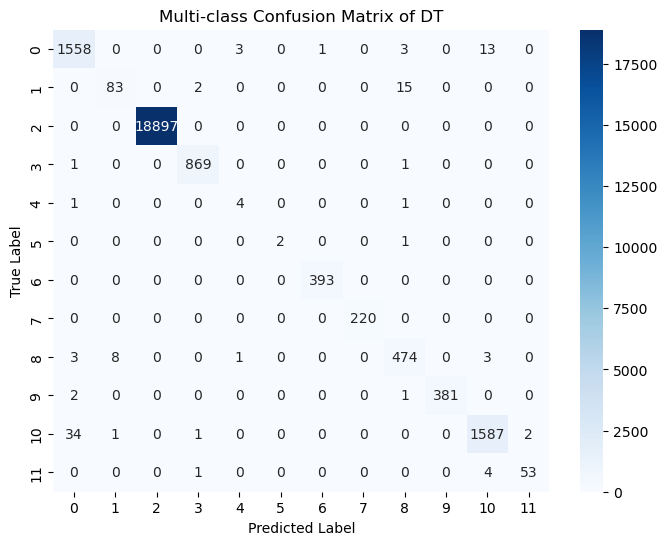

In [14]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Multi-class Confusion Matrix of DT')
plt.show()